## Ridge Regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#data genration
rng = np.random.default_rng(seed = 42)
n = 20 # no. of sample
x = np.linspace(-1,1  , num = 2 * n) #, dtype = int
print(x)

[-1.         -0.94871795 -0.8974359  -0.84615385 -0.79487179 -0.74358974
 -0.69230769 -0.64102564 -0.58974359 -0.53846154 -0.48717949 -0.43589744
 -0.38461538 -0.33333333 -0.28205128 -0.23076923 -0.17948718 -0.12820513
 -0.07692308 -0.02564103  0.02564103  0.07692308  0.12820513  0.17948718
  0.23076923  0.28205128  0.33333333  0.38461538  0.43589744  0.48717949
  0.53846154  0.58974359  0.64102564  0.69230769  0.74358974  0.79487179
  0.84615385  0.8974359   0.94871795  1.        ]


The function rng.normal(0, 0.2, 2*n) generates random numbers from a normal (Gaussian) distribution:

0 is the mean (center) of the distribution.    

0.2 is the standard deviation (spread).    

2*n is the number of random values generated.    

Purpose in your code:    

It adds random noise to the sine wave, making the data more realistic and simulating measurement errors or natural variability.

In [6]:
y  = np.sin(2 * np.pi *x) + rng.normal(0 , 0.2 , 2*n)
print(y)

[ 0.06094342  0.10867117  0.7508325   1.01109681  0.57031107  0.7387531
  0.96058432  0.71135644  0.53110559  0.06870688  0.09541303 -0.23640822
 -0.64991652 -0.64057716 -0.88628878 -1.16456737 -0.82970028 -0.91297897
 -0.28903311 -0.17039646  0.12343881  0.32853726  0.96571072  0.87254454
  0.90704331  0.90936394  0.97248724  0.73621147  0.47451313  0.16663077
  0.18901386 -0.61574883 -0.87705351 -1.09777079 -0.87599311 -0.73472365
 -0.84577336 -0.76877356 -0.48156424  0.13011856]


In [7]:
p = 20
X = np.array(([x**j for j in range(p+1)]))

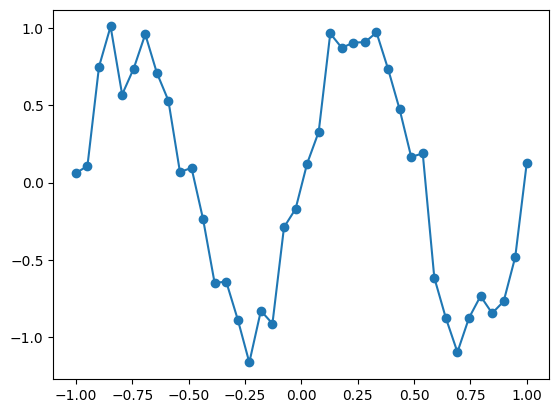

In [8]:
# visulize
plt.scatter(x,y)
plt.plot(x,y)

In [9]:
#use linear regression
w_linear = np.linalg.pinv(X.T) @ y
print(w_linear)

[ 4.46192512e-03  5.71540980e+00  1.32911358e-01  1.43131305e+01
 -5.16771031e+01 -1.20459237e+03  1.17208454e+03  1.21138910e+04
 -9.63376498e+03 -5.92064420e+04  4.08050126e+04  1.63752673e+05
 -1.00979639e+05 -2.67904305e+05  1.51973419e+05  2.56712535e+05
 -1.36978880e+05 -1.33134265e+05  6.79454870e+04  2.88505126e+04
 -1.42520839e+04]


In [10]:
y_pred = np.array(
    [w_linear[i]* (x ** i) for i in range(w_linear.shape[0])]).sum(axis = 0)

print(y_pred)

[ 0.06156174  0.10173081  0.78368764  0.92913818  0.67389751  0.71096916
  0.87270318  0.80350923  0.49757853  0.16612869 -0.06590031 -0.24400698
 -0.46237955 -0.73187582 -0.96425324 -1.05376707 -0.9612012  -0.73031696
 -0.43943467 -0.14224969  0.1513043   0.44677534  0.72478485  0.93166307
  1.01350493  0.96327588  0.83285437  0.68832553  0.54118909  0.32501365
 -0.03694529 -0.51327935 -0.91875468 -1.04532929 -0.89934243 -0.75799439
 -0.81390006 -0.78447905 -0.47782234  0.12975673]


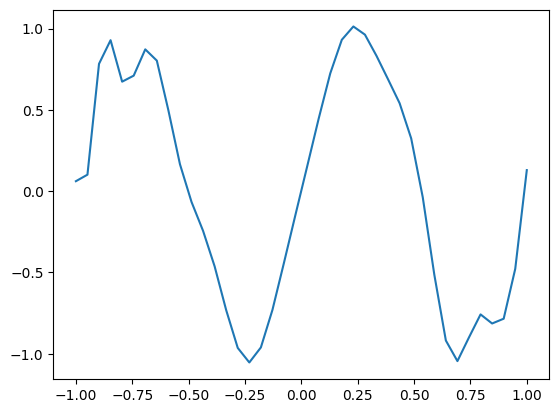

In [11]:
plt.plot(x , y_pred)


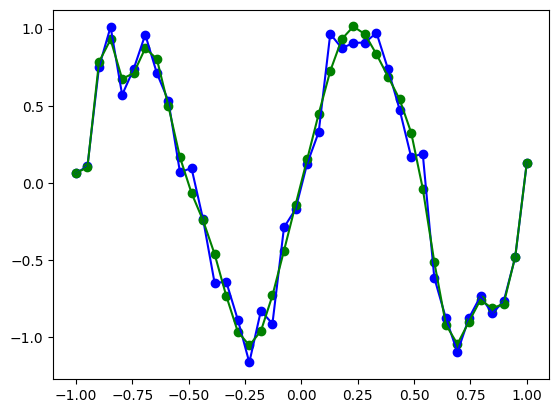

In [12]:
plt.scatter(x,y , color = 'blue')
plt.plot(x,y ,color = 'blue' )
plt.plot(x , y_pred , color = 'green')
plt.scatter(x , y_pred , color = 'green')


## Loss funtion

$\text{Loss}(w) = \frac{1}{2} \sum_{i=1}^{n} \left( (X^\top w)_i - y_i \right)^2$

In [13]:
def loss(X, y , w):
    err = X.T @ w - y
    return (err** 2).sum()/2
loss = loss(X, y_pred,w_linear)
print(round(loss))

0


$\text{Loss}_{\text{ridge}}(w) = \frac{1}{2} \sum_{i=1}^{n} \left( (X^\top w)_i - y_i \right)^2 + \frac{\lambda}{2} \sum_{j=1}^{p} w_j^2$

In [14]:
print(w_linear.shape)

(21,)


In [15]:
## 
lamb = 0.01
l2_penalty = np.linalg.norm(w_linear)**2  # Same as (w**2).sum()
ridge_loss = 0.5 * (( X.T @ w_linear- y)**2).sum() + (lamb / 2) * l2_penalty
print(l2_penalty)
print(ridge_loss)


245334632264.89032
1226673161.5336804


In [16]:
# Ridge loss
def loss(X,y,w,lamb):
    err = X.T @ w - y
    return ((err**2).sum()/2
            + (lamb/2)*(w**2).sum())
loss(X ,y_pred , w_linear,0.01)

1226673161.3244517

## rigde closed form solution

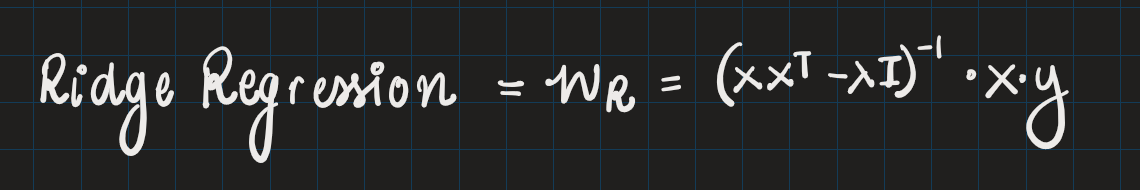

In [17]:
def get_w_ridge( X ,y,lamb):
    d , n = X.shape
    w_star  = np.linalg.inv(X @ X.T  - lamb*np.eye(d) ) @ X @y 
    return w_star

In [18]:
w_ridge = get_w_ridge(X,y , lamb = 0.001)
# print(w_ridge)
w_ridge.shape

(21,)

In [19]:
y_ridge  = np.array([w_ridge[i] * (x ** i)
                    for i in range(w_ridge.shape[0])]).sum(axis = 0)
y_ridge

array([-0.32676195,  1.37000798,  0.36087641, -0.07147993,  0.24413153,
        0.81140206,  1.23144731,  1.3349716 ,  1.12403169,  0.68817665,
        0.14274744, -0.40595216, -0.87592804, -1.21326986, -1.39020891,
       -1.40090061, -1.25671808, -0.98185184, -0.60947932, -0.17850707,
        0.2692259 ,  0.69143903,  1.04776158,  1.30210687,  1.42521981,
        1.39752084,  1.2123127 ,  0.87929491,  0.42808476, -0.08902734,
       -0.59669178, -1.00140543, -1.20636736, -1.14233007, -0.81891975,
       -0.38951568, -0.18588484, -0.58347245, -1.34008341,  0.41016274])

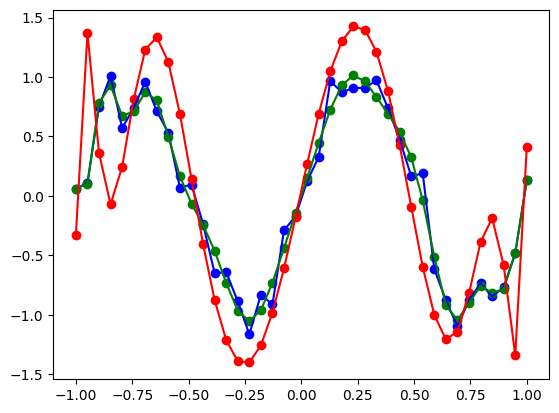

In [20]:
plt.scatter(x,y , color = 'blue')
plt.plot(x,y ,color = 'blue' )


plt.plot(x , y_pred , color = 'green')
plt.scatter(x , y_pred , color = 'green')


plt.plot(x , y_ridge , color = 'red')
plt.scatter(x , y_ridge, color = 'red')

